In [1]:
#판다스의 한글 퐅트 설정
import matplotlib.pyplot as plt

In [2]:
#판다스의 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [3]:
plt.rc('font', family='NanumBarunGothic')

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
import pandas as pd

In [16]:
# 필요한 라이브러리 임포트
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Mean Squared Error (Regression): 254583183.32698128


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


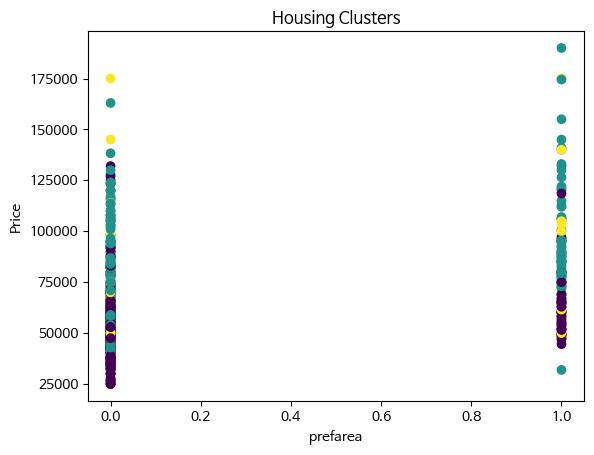

In [21]:
# 데이터셋 로드
url = 'https://raw.githubusercontent.com/chandanverma07/DataSets/master/Housing_Data.csv'
data = pd.read_csv(url)

# 특성과 타겟 데이터 분리
X = data.drop('price', axis=1)
y = data['price']

# 범주형 변수 더미 변수로 변환
X_encoded = pd.get_dummies(X, drop_first=True)

# 회귀 모델 훈련 및 예측
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
y_pred = reg_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (Regression):", mse)

from sklearn.preprocessing import LabelEncoder

# 데이터 전처리 - 라벨 인코딩
X_encoded = X.copy()
label_encoder = LabelEncoder()
for col in X_encoded.columns:
    if X_encoded[col].dtype == 'object':
        X_encoded[col] = label_encoder.fit_transform(X_encoded[col])

# K-means 클러스터링
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_encoded)
clusters = kmeans.predict(X_encoded)

# 클러스터링 결과 시각화
plt.scatter(X_encoded['prefarea'], y, c=clusters)
plt.xlabel('prefarea')
plt.ylabel('Price')
plt.title('Housing Clusters')
plt.show()
